# Calculate performance of the Faster R-CNN model based on IoU

## Set Working Directory

In [1]:
# if get error "ImportError: No module named utils"
# change working directory

# ONLY NEED TO RUN THIS CELL ONCE

import os
os.chdir('./stage1')
os.getcwd()

'/Users/mingrenshen/PycharmProjects/MedImgAnalysis/stage1'

## Load Library

In [11]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import imageUtils
from utils import postProcessing
from utils import DetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [3]:
#load Data
root = './Data'
#dataset = MultiDetectionDataset(data_dir=root, split='train')
dataset_test = DetectionDataset(data_dir=root, split='test')
bbox_label_names = ('Bleeding')

# DataSet Statistics
#print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

('total number of test images: ', 22)
('type of defects: ', 'Bleeding')


## Load Tranied Model

In [4]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=1, 
                        pretrained_model='../Archive/Models/20181202/snapshot_model_100000_20181202.npz', 
                        ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1000, 
                        max_size=1000,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('Bleeding')

### IoU Caculation

Test image 0


[[270.8530578613281, 630.8943481445312, 300.6378479003906, 662.4575805664062], [283.0474853515625, 622.6069946289062, 311.50677490234375, 652.3446655273438], [312.1783142089844, 672.0746459960938, 338.5467834472656, 701.0219116210938]]
[[332.0, 386.0, 385.0, 425.0]]
[[270.85306 630.89435 300.63785 662.4576 ]
 [283.0475  622.607   311.50677 652.34467]
 [312.1783  672.07465 338.54678 701.0219 ]]
[[332. 386. 385. 425.]]


Test image 1


[[336.7666931152344, 390.4823913574219, 377.6152648925781, 421.9682312011719]]
[[329.0, 378.0, 378.0, 424.0]]
[[336.7667  390.4824  377.61526 421.96823]]
[[329. 378. 378. 424.]]
Test image 2


[[320.94482421875, 383.5793151855469, 373.90252685546875, 430.0872497558594], [347.1990966796875, 396.5614318847656, 378.2086181640625, 416.8257141113281], [336.82574462890625, 404.1784973144531, 368.56396484375, 423.9712829589844]]
[[322.0, 388.0, 376.0, 430.0]]
[[320.94482 383.5793  373.90253 430.08725]
 [347.1991  396.56143 378.20862 416.8257 ]
 [336.82574 404.1785  368.56396 423.97128]]
[[322. 388. 376. 430.]]
Test image 3


[[523.4994506835938, 450.0409851074219, 613.0673217773438, 497.3300476074219], [341.8099060058594, 645.6841430664062, 358.2087097167969, 668.2042846679688], [349.0546569824219, 641.6846313476562, 365.4819641113281, 663.2410278320312], [255.07896423339844, 302.6383972167969, 272.81939697265625, 323.2009582519531], [355.14544677734375, 652.8489379882812, 369.78436279296875, 668.8718872070312], [336.2449035644531, 638.9506225585938, 352.5513610839844, 659.0178833007812], [426.3269958496094, 627.4942016601562, 455.7156677246094, 662.3893432617188]]
[[332.0, 396.0, 400.0, 446.0]]
[[523.49945 450.041   613.0673  497.33005]
 [341.8099  645.68414 358.2087  668.2043 ]
 [349.05466 641.68463 365.48196 663.241  ]
 [255.07896 302.6384  272.8194  323.20096]
 [355.14545 652.84894 369.78436 668.8719 ]
 [336.2449  638.9506  352.55136 659.0179 ]
 [426.327   627.4942  455.71567 662.38934]]
[[332. 396. 400. 446.]]
Test image 4


[[426.4659729003906, 631.9805908203125, 460.7819519042969, 674.1893310546875], [241.91445922851562, 302.1824035644531, 271.4912414550781, 329.9396057128906], [437.4388732910156, 649.8728637695312, 463.6463928222656, 665.7197875976562], [424.1021423339844, 641.4667358398438, 448.4163513183594, 657.0879516601562], [422.9088439941406, 650.5221557617188, 447.5396423339844, 665.4276733398438], [234.71783447265625, 292.18115234375, 284.722412109375, 354.74749755859375], [254.02381896972656, 296.67645263671875, 285.2022399902344, 323.92242431640625], [259.9920654296875, 311.69610595703125, 287.09228515625, 336.1983642578125], [401.20867919921875, 625.4934692382812, 485.1788330078125, 702.8391723632812], [413.2769775390625, 629.1417846679688, 441.44732666015625, 664.9132690429688]]
[[332.0, 378.0, 398.0, 430.0]]
[[426.46597 631.9806  460.78195 674.18933]
 [241.91446 302.1824  271.49124 329.9396 ]
 [437.43887 649.87286 463.6464  665.7198 ]
 [424.10214 641.46674 448.41635 657.08795]
 [422.90884 

Test image 5


[[333.8536071777344, 383.49237060546875, 389.0913391113281, 437.68695068359375], [534.6260375976562, 442.4172058105469, 611.3307495117188, 487.3501892089844]]
[[325.0, 379.0, 390.0, 434.0]]
[[333.8536  383.49237 389.09134 437.68695]
 [534.62604 442.4172  611.33075 487.3502 ]]
[[325. 379. 390. 434.]]
Test image 6


[[338.8053894042969, 473.8153076171875, 376.7316589355469, 523.4788208007812], [335.074462890625, 390.0974426269531, 384.71759033203125, 426.9618225097656], [527.6903076171875, 447.8149108886719, 579.2266845703125, 521.7738647460938], [346.17108154296875, 472.96881103515625, 366.817626953125, 500.52435302734375], [262.42279052734375, 334.74420166015625, 324.1287841796875, 409.11602783203125], [336.8252868652344, 485.4542236328125, 359.1023254394531, 506.23687744140625]]
[[322.0, 384.0, 386.0, 430.0]]
[[338.8054  473.8153  376.73166 523.4788 ]
 [335.07446 390.09744 384.7176  426.96182]
 [527.6903  447.8149  579.2267  521.77386]
 [346.17108 472.9688  366.81763 500.52435]
 [262.4228  334.7442  324.12878 409.11603]
 [336.8253  485.45422 359.10233 506.23688]]
[[322. 384. 386. 430.]]
Test image 7


[[640.607177734375, 212.43499755859375, 728.3651123046875, 316.2900390625], [545.880126953125, 463.3138122558594, 595.2139892578125, 496.3265075683594], [654.4522705078125, 134.15518188476562, 748.2596435546875, 210.11651611328125]]
[[336.0, 396.0, 402.0, 448.0]]
[[640.6072  212.435   728.3651  316.29004]
 [545.8801  463.3138  595.214   496.3265 ]
 [654.4523  134.15518 748.25964 210.11652]]
[[336. 396. 402. 448.]]
Test image 8


[[335.84368896484375, 274.893798828125, 362.50274658203125, 299.00726318359375], [427.0479736328125, 426.2176818847656, 452.88726806640625, 453.3519592285156], [343.67828369140625, 646.259521484375, 362.626953125, 668.1282958984375], [334.9841613769531, 279.3782653808594, 347.1871643066406, 295.6944274902344], [421.8699951171875, 420.5805969238281, 442.7205810546875, 443.0747985839844], [342.8357238769531, 272.9644775390625, 355.7591857910156, 285.5889892578125], [346.54913330078125, 264.9909362792969, 371.5870361328125, 290.8393859863281], [533.5919799804688, 447.4192810058594, 609.9469604492188, 503.0646057128906], [332.1828918457031, 269.65570068359375, 349.1933898925781, 288.8961181640625]]
[[338.0, 389.0, 405.0, 437.0]]
[[335.8437  274.8938  362.50275 299.00726]
 [427.04797 426.21768 452.88727 453.35196]
 [343.67828 646.2595  362.62695 668.1283 ]
 [334.98416 279.37827 347.18716 295.69443]
 [421.87    420.5806  442.72058 443.0748 ]
 [342.83572 272.96448 355.7592  285.589  ]
 [346.5

Test image 9


[[424.076904296875, 628.9588623046875, 459.2174072265625, 674.7484130859375], [528.58154296875, 449.7310791015625, 609.2030029296875, 493.965576171875], [327.3852233886719, 273.89837646484375, 352.9213562011719, 302.72314453125], [336.8211669921875, 282.93115234375, 358.63897705078125, 297.3836669921875], [324.561767578125, 284.0108337402344, 339.90924072265625, 297.2470397949219], [340.4710693359375, 272.37994384765625, 358.08282470703125, 290.4024658203125], [310.38568115234375, 271.9228820800781, 370.32635498046875, 315.3215637207031], [339.0340881347656, 284.95684814453125, 368.4217834472656, 310.75726318359375], [318.8189697265625, 283.87103271484375, 344.59844970703125, 312.31463623046875]]
[[337.0, 381.0, 408.0, 432.0]]
[[424.0769  628.95886 459.2174  674.7484 ]
 [528.58154 449.73108 609.203   493.96558]
 [327.38522 273.89838 352.92136 302.72314]
 [336.82117 282.93115 358.63898 297.38367]
 [324.56177 284.01083 339.90924 297.24704]
 [340.47107 272.37994 358.08282 290.40247]
 [310

[[238.09130859375, 308.8830871582031, 265.4472351074219, 340.8046569824219], [248.3033447265625, 300.6930847167969, 275.62408447265625, 328.6772766113281], [254.76910400390625, 321.13214111328125, 271.7552490234375, 333.83026123046875]]
[[352.0, 394.0, 381.0, 425.0]]
[[238.09131 308.8831  265.44724 340.80466]
 [248.30334 300.69308 275.62408 328.67728]
 [254.7691  321.13214 271.75525 333.83026]]
[[352. 394. 381. 425.]]
Test image 11


[[89.92532348632812, 278.5416259765625, 211.1312255859375, 395.3408203125], [621.396728515625, 115.27931213378906, 654.6370849609375, 152.0802764892578], [445.56591796875, 435.7306213378906, 493.2939453125, 471.3577575683594]]
[[520.0, 396.0, 574.0, 448.0]]
[[ 89.92532 278.54163 211.13123 395.34082]
 [621.3967  115.27931 654.6371  152.08028]
 [445.56592 435.73062 493.29395 471.35776]]
[[520. 396. 574. 448.]]
Test image 12


[[290.2431945800781, 99.74400329589844, 340.3569641113281, 136.68411254882812], [521.8740844726562, 380.72918701171875, 591.7050170898438, 465.6575927734375], [287.4471740722656, 111.2613754272461, 319.4560852050781, 130.0399169921875], [128.8564453125, 284.6975402832031, 219.39205932617188, 392.6276550292969], [301.2950744628906, 102.59378051757812, 324.7675476074219, 121.57328796386719], [295.2666320800781, 81.90423583984375, 355.0033874511719, 175.84597778320312]]
[[512.0, 396.0, 572.0, 458.0]]
[[290.2432    99.744    340.35696  136.68411 ]
 [521.8741   380.7292   591.705    465.6576  ]
 [287.44717  111.261375 319.4561   130.03992 ]
 [128.85645  284.69754  219.39206  392.62766 ]
 [301.29507  102.59378  324.76755  121.57329 ]
 [295.26663   81.904236 355.0034   175.84598 ]]
[[512. 396. 572. 458.]]


Test image 13


[[504.20111083984375, 387.0354919433594, 596.0294799804688, 479.1040344238281], [403.4438171386719, 569.4686279296875, 535.0230712890625, 664.8057861328125], [364.8881530761719, 159.18209838867188, 436.5502624511719, 248.38339233398438], [200.1896209716797, 593.0211791992188, 293.3022766113281, 678.3609008789062]]
[[504.0, 388.0, 562.0, 460.0]]
[[504.2011  387.0355  596.0295  479.10403]
 [403.44382 569.4686  535.0231  664.8058 ]
 [364.88815 159.1821  436.55026 248.38339]
 [200.18962 593.0212  293.30228 678.3609 ]]
[[504. 388. 562. 460.]]


Test image 14


[[369.7030334472656, 162.83969116210938, 421.0246276855469, 221.10385131835938], [701.222900390625, 251.09288024902344, 771.6754150390625, 303.963134765625], [811.9133911132812, 386.5179443359375, 885.0073852539062, 477.21063232421875]]
[[500.0, 382.0, 584.0, 466.0]]
[[369.70303 162.83969 421.02463 221.10385]
 [701.2229  251.09288 771.6754  303.96313]
 [811.9134  386.51794 885.0074  477.21063]]
[[500. 382. 584. 466.]]


Test image 15


[[116.90193176269531, 577.9849243164062, 234.6256561279297, 726.8552856445312], [775.1829223632812, 411.3569641113281, 893.9398803710938, 500.6211853027344], [111.71418762207031, 621.3330688476562, 226.95445251464844, 661.0223999023438], [108.61968231201172, 644.1401977539062, 241.12301635742188, 683.7749633789062]]
[[552.0, 358.0, 644.0, 474.0]]
[[116.90193 577.9849  234.62566 726.8553 ]
 [775.1829  411.35696 893.9399  500.6212 ]
 [111.71419 621.33307 226.95445 661.0224 ]
 [108.61968 644.1402  241.12302 683.77496]]
[[552. 358. 644. 474.]]
Test image 16


[[831.0914306640625, 454.984619140625, 881.3988037109375, 510.7618408203125], [122.74858093261719, 149.7659149169922, 160.55738830566406, 189.5917510986328], [843.6362915039062, 470.043701171875, 868.1102905273438, 500.04840087890625], [702.7415161132812, 369.1418762207031, 752.7390747070312, 428.5278625488281], [804.5748291015625, 440.85443115234375, 917.031005859375, 541.3997192382812], [851.80908203125, 491.50592041015625, 884.6121826171875, 511.08416748046875], [830.6574096679688, 467.4419250488281, 854.3496704101562, 499.1827087402344], [845.3258666992188, 465.52362060546875, 866.0838012695312, 480.48663330078125], [131.06777954101562, 603.3709106445312, 237.42996215820312, 716.5090942382812], [823.2156982421875, 714.6732177734375, 861.52880859375, 755.46435546875], [857.25927734375, 476.739501953125, 903.29052734375, 517.3515014648438], [822.2075805664062, 499.6188049316406, 915.5385131835938, 527.4273071289062], [856.6563110351562, 479.4831237792969, 880.6870727539062, 495.66006

[[803.2103271484375, 453.773193359375, 840.213134765625, 486.68768310546875]]
[[538.0, 398.0, 616.0, 492.0]]
[[803.2103  453.7732  840.21313 486.68768]]
[[538. 398. 616. 492.]]
Test image 18


[[285.5303649902344, 314.6764831542969, 396.2174987792969, 409.5495910644531], [678.1680908203125, 126.96853637695312, 725.737060546875, 165.30145263671875]]
[[518.0, 350.0, 610.0, 496.0]]
[[285.53036 314.67648 396.2175  409.5496 ]
 [678.1681  126.96854 725.73706 165.30145]]
[[518. 350. 610. 496.]]
Test image 19


[[532.24658203125, 395.34942626953125, 610.988037109375, 499.73046875], [275.48284912109375, 341.90533447265625, 391.00439453125, 424.46868896484375], [670.8636474609375, 125.45042419433594, 728.0977783203125, 164.55638122558594], [325.0999450683594, 460.76898193359375, 419.7278137207031, 593.8528442382812]]
[[506.0, 340.0, 614.0, 500.0]]
[[532.2466   395.34943  610.98804  499.73047 ]
 [275.48285  341.90533  391.0044   424.4687  ]
 [670.86365  125.450424 728.0978   164.55638 ]
 [325.09995  460.76898  419.7278   593.85284 ]]
[[506. 340. 614. 500.]]


Test image 20


[[511.4436950683594, 360.3416748046875, 625.9700927734375, 496.840087890625], [658.6780395507812, 108.52743530273438, 713.9130249023438, 145.2738800048828], [264.0602722167969, 321.6114807128906, 380.9523620605469, 412.9867248535156], [894.6765747070312, 407.1741943359375, 932.9558715820312, 440.9822998046875], [807.0715942382812, 515.01513671875, 837.5973510742188, 545.2305908203125], [510.11627197265625, 252.69171142578125, 587.9837036132812, 379.82147216796875]]
[[504.0, 270.0, 624.0, 478.0]]
[[511.4437   360.34167  625.9701   496.8401  ]
 [658.67804  108.527435 713.913    145.27388 ]
 [264.06027  321.61148  380.95236  412.98672 ]
 [894.6766   407.1742   932.9559   440.9823  ]
 [807.0716   515.01514  837.59735  545.2306  ]
 [510.11627  252.69171  587.9837   379.82147 ]]
[[504. 270. 624. 478.]]
Test image 21


/Users/mingrenshen/anaconda2/envs/MedImgAnalysis/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[[260.98779296875, 313.6469421386719, 366.7681884765625, 425.8548278808594], [507.16070556640625, 342.8899230957031, 622.4672241210938, 497.4967346191406], [205.23529052734375, 118.68533325195312, 239.89743041992188, 163.115966796875], [222.03338623046875, 130.4115447998047, 243.5714111328125, 152.5302276611328], [213.2257080078125, 130.69642639160156, 225.662109375, 150.51609802246094], [223.08238220214844, 140.79934692382812, 237.7625274658203, 160.55929565429688], [210.96495056152344, 142.14642333984375, 230.6718292236328, 162.96151733398438], [216.6981658935547, 139.21920776367188, 245.2793731689453, 178.5970458984375]]
[[504.0, 260.0, 610.0, 474.0]]
[[260.9878  313.64694 366.7682  425.85483]
 [507.1607  342.88992 622.4672  497.49673]
 [205.23529 118.68533 239.89743 163.11597]
 [222.03339 130.41154 243.57141 152.53023]
 [213.22571 130.69643 225.66211 150.5161 ]
 [223.08238 140.79935 237.76253 160.5593 ]
 [210.96495 142.14642 230.67183 162.96152]
 [216.69817 139.21921 245.27937 178.

Done


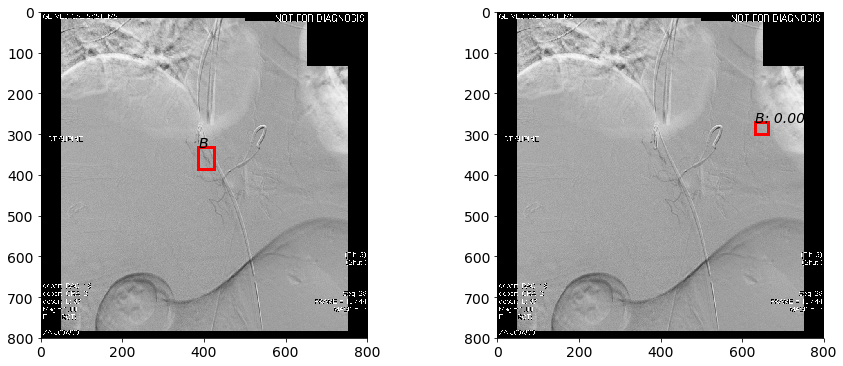

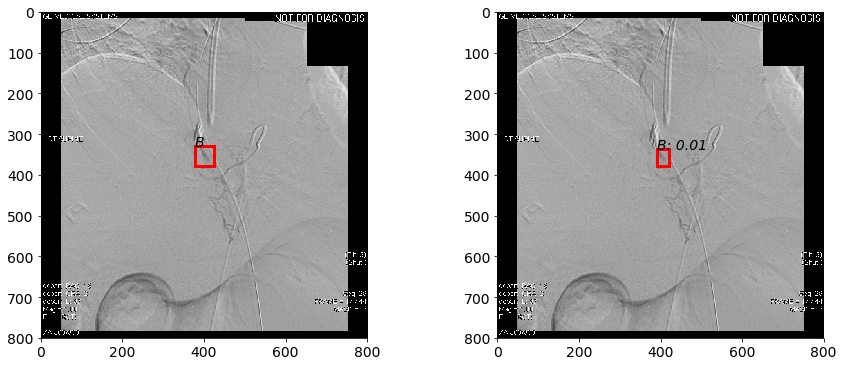

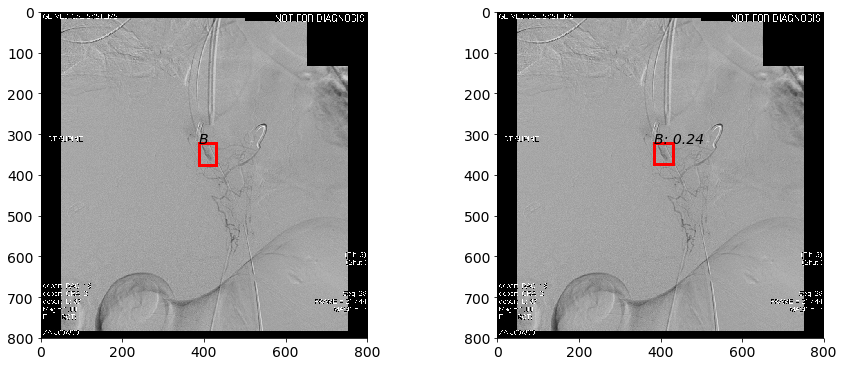

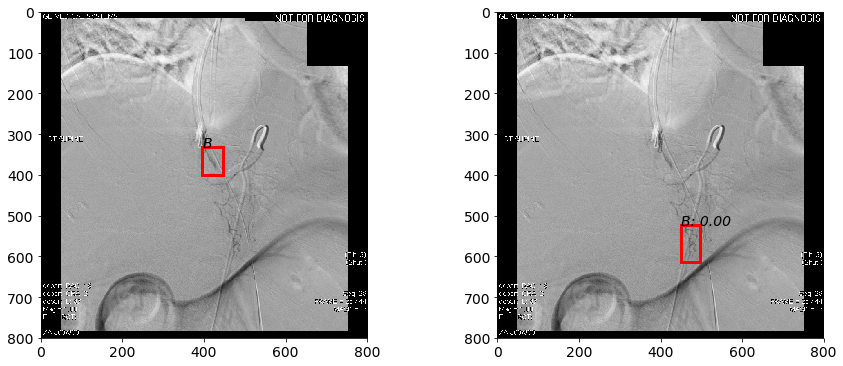

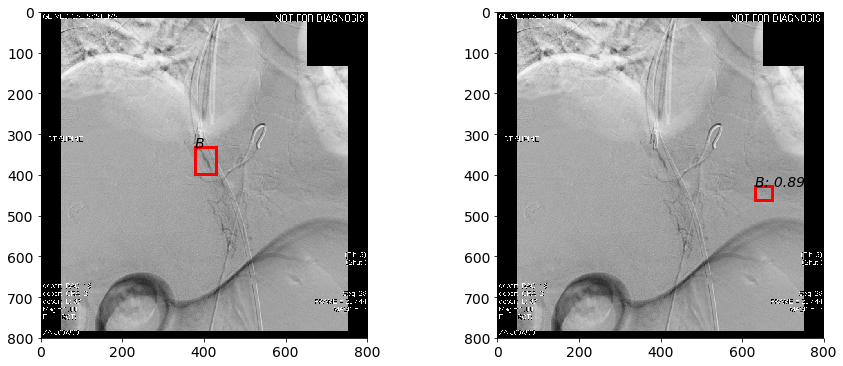

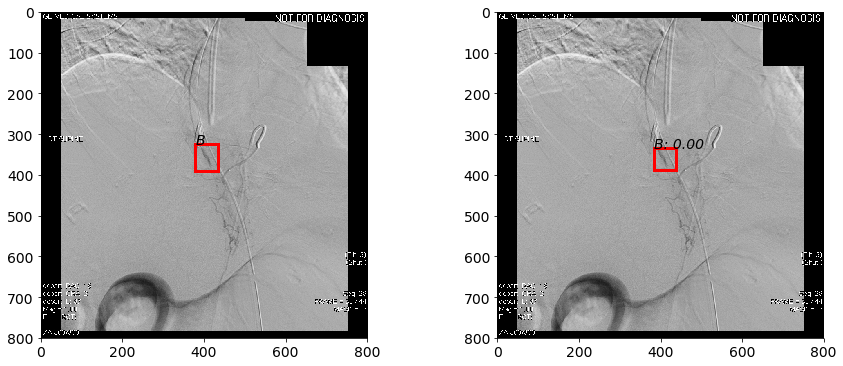

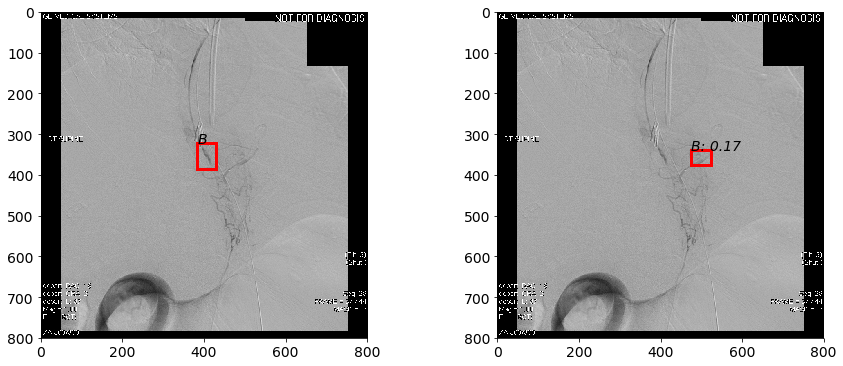

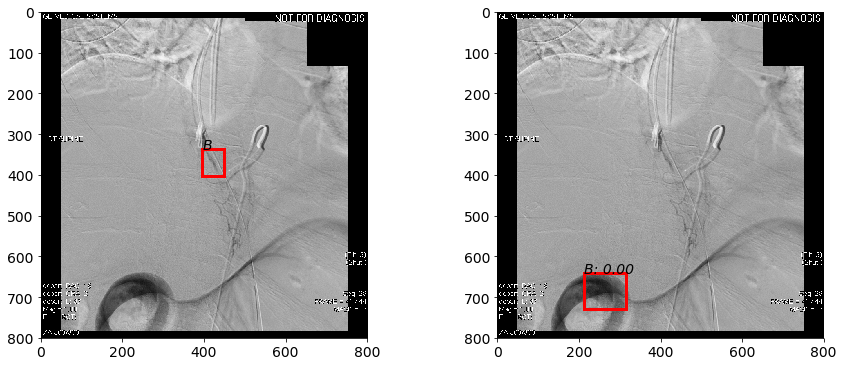

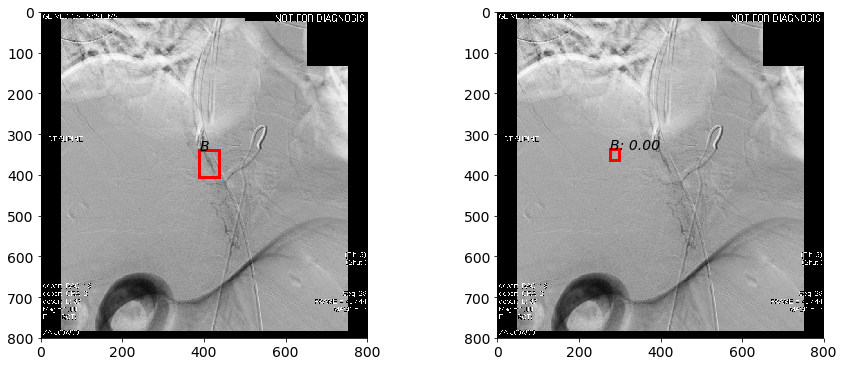

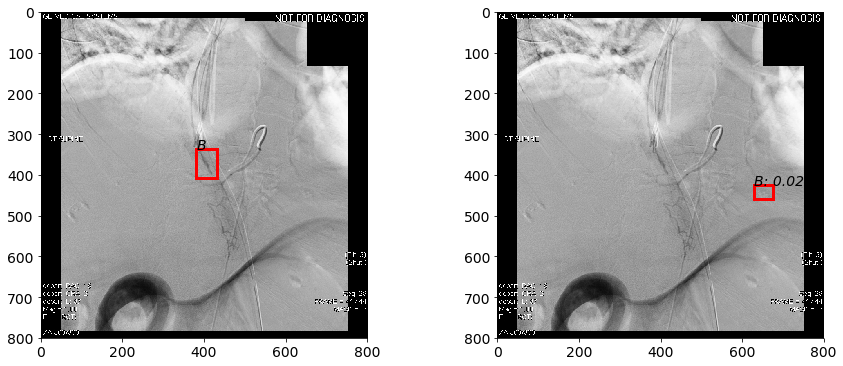

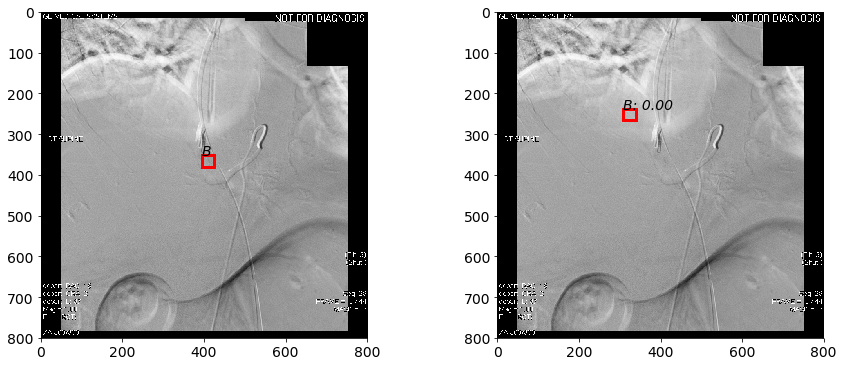

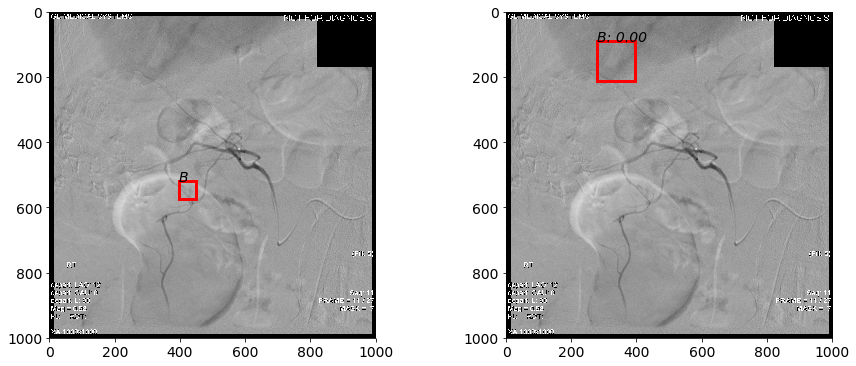

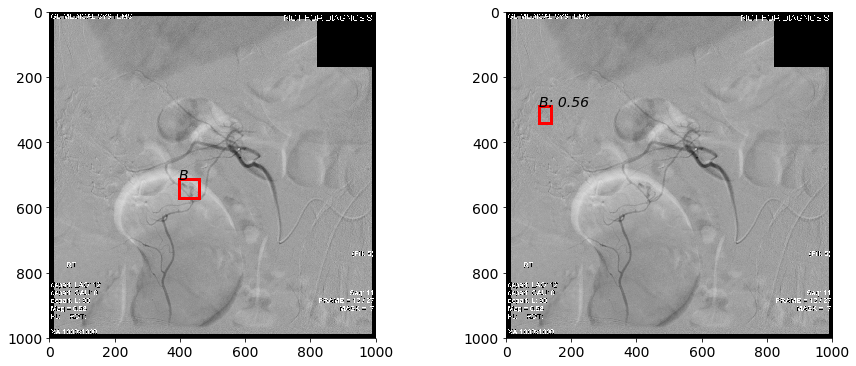

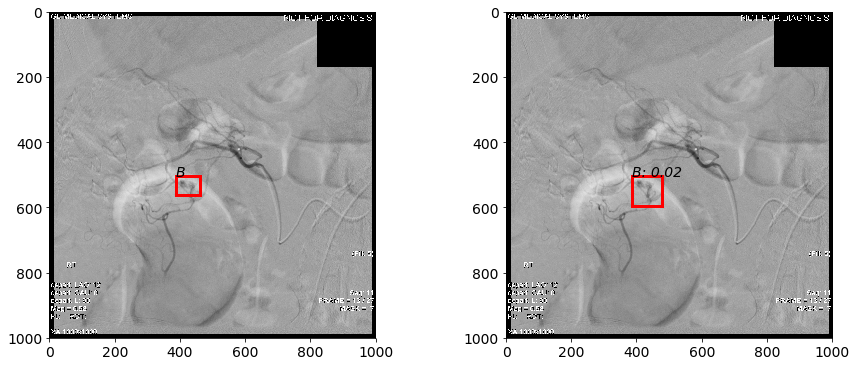

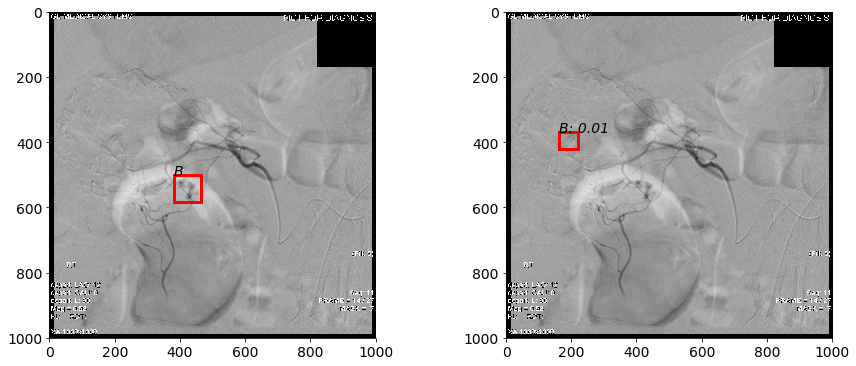

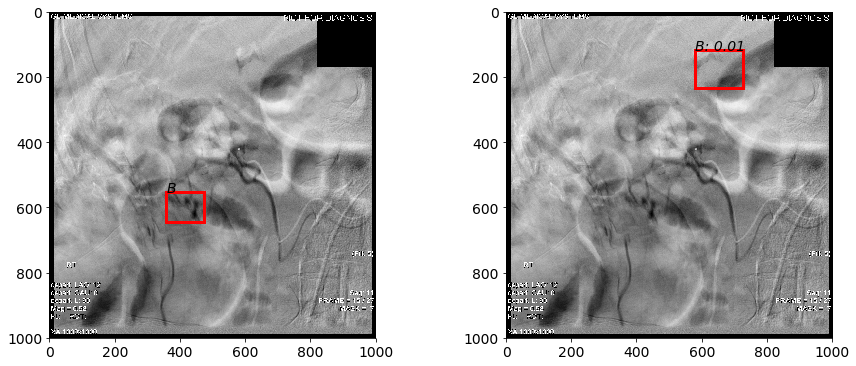

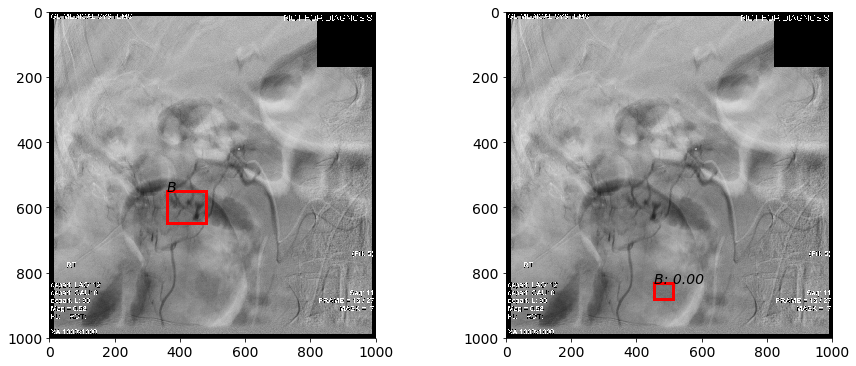

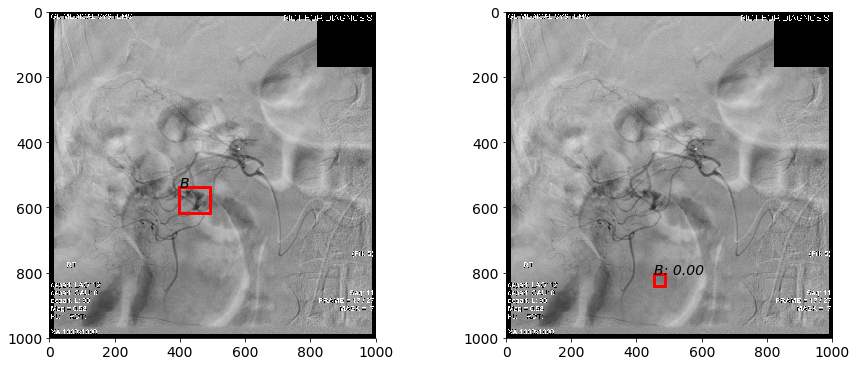

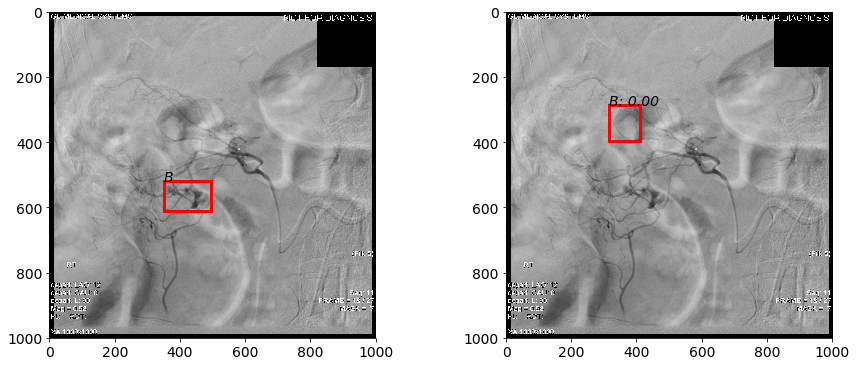

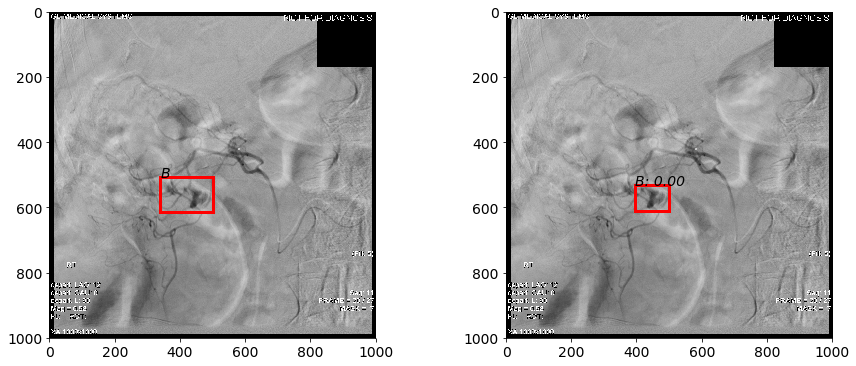

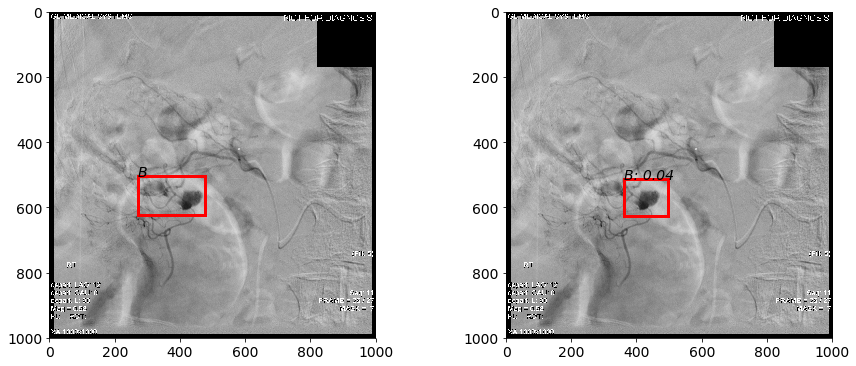

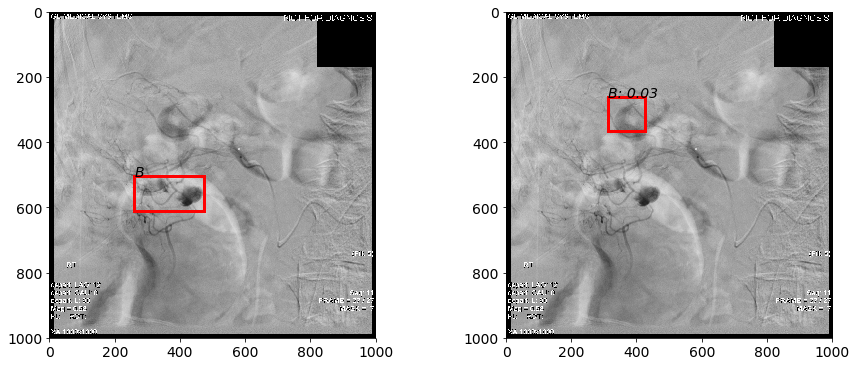

In [17]:
# import the iou function from  utils.evaluation

from utils.evaluation import bbox_iou
testIoUList = list()
for i in range(0,len(dataset_test)):
	print("Test image %d"%i)
	# Prediction of second image
	img, gt_bboxes, gt_labels = dataset_test[i]
	model.score_thresh = 0.00001
	pred_bboxes, pred_labels, pred_scores = model.predict([img])
	predbboxes = pred_bboxes[0].tolist()
	gtbboxes = gt_bboxes.tolist()
	print(predbboxes)
	print(gtbboxes)
	tmp = bbox_iou(predbboxes[0],gtbboxes[0])
	testIoUList.append(tmp)
	fig = plt.figure(figsize=(15,6))
	ax1 = fig.add_subplot(1, 2, 2)
	ax2 = fig.add_subplot(1, 2, 1)
	# plot prediction
	visualization.vis_bbox(img, pred_bboxes[0], pred_labels[0], pred_scores[0], label_names=bbox_label_names, ax=ax1)
	# plot ground truth
	visualization.vis_bbox(img, gt_bboxes, gt_labels, label_names=bbox_label_names,ax=ax2)
	
	fig.savefig("IoUtest"+str(i)+".png")
print("Done")

In [18]:
print(testIoUList)

[0.0, 0.5706085107015467, 0.8545142105168343, 0.0, 0.0, 0.7383378701730979, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4913836149121006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4756432385837532, 0.48422067982615147, 0.0]


In [22]:
Tlist = [x for x in testIoUList if x > 0.4 ]

In [23]:
print(Tlist)

[0.5706085107015467, 0.8545142105168343, 0.7383378701730979, 0.4913836149121006, 0.4756432385837532, 0.48422067982615147]


In [24]:
p = 1.0 * len(Tlist) / len(testIoUList)

In [25]:
print(p)

0.272727272727


In [27]:
# plot historygrarme 
import pandas as pd
df = pd.DataFrame({'IoU' : testIoUList})

<Figure size 1080x432 with 0 Axes>

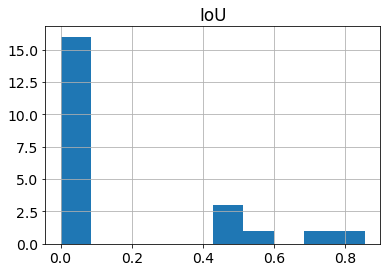

In [29]:
import matplotlib.pyplot as plt
import time

histgramFileName = "Hist_" + time.strftime("%Y%m%d_%H%M%S")
fig = plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1,1)
df.hist(bins=10, ax=ax)
fig.savefig(histgramFileName)